**Install the required libraries**

In [1]:
# Install the required libraries
!pip install biopython
!apt-get install clustalw
!apt-get install -y emboss
!apt-get install -y mafft

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 22.3 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Suggested packages:
  clustalx seaview
The following NEW packages will be installed:
  clustalw
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 275 kB of archives.
After this operation, 818 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 clustalw amd64 2.1+lgpl-7 [275 kB]
Fetched 275 kB in 0s (1,439 kB/s)
Selecting previously unselected package clustalw.
(Reading database ... 123634 files and directories currently installed.)
Preparing to unpack .../clustalw_2.1+lgpl-7_amd64.deb ...
Unpacking clustalw (2.1+lgpl-7) ...
Setting up clustalw (2.1+lgpl-7) ...
Processing triggers for man-db (2.10.2-1) ...
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will b

**Imports**

In [2]:
from Bio import SeqIO, AlignIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Align import MultipleSeqAlignment
from Bio.Align.Applications import ClustalwCommandline
from collections import Counter
import os
from Bio import Phylo
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
from datetime import datetime
import re

/usr/local/lib/python3.10/dist-packages/Bio/Application/__init__.py:39: BiopythonDeprecationWarning: The Bio.Application modules and modules relying on it have been deprecated.

Due to the on going maintenance burden of keeping command line application
wrappers up to date, we have decided to deprecate and eventually remove these
modules.

We instead now recommend building your command line and invoking it directly
with the subprocess module.
  warnings.warn(


# **Select 10 Delta variant sequences from Ghana**

In [3]:
def load_data(file_path, status):
  """
    Load data samples.

    Args:
    - file_path: Path to the FASTA file containing the sequences.
    - status: reference or case status.

    Returns:
    - sequences: List of Bio.SeqRecord objects representing the loaded sequences.
  """
  # Read the first 10 sequences
  sequences = []
  for i, record in enumerate(SeqIO.parse(file_path, "fasta")):
      if i < 10:
          # Reformat the ID to include the sample status (reference or case)|EPI_ISL unique identifier|sample date
          record.id= status + record.id.split("|")[1] + "|" + record.id.split("|")[2]
          record.name= status + record.name.split("|")[1] + "|" + record.name.split("|")[2]
          sequences.append(record)
      else:
          break

  print(f"Loaded {len(sequences)} sequences.")
  return sequences

In [4]:
reference_sequences= load_data("/content/ghana_delta.fasta", "ref|")

Loaded 10 sequences.


In [5]:
for i, record in enumerate(reference_sequences):
    print(f"Sequence {i+1}:")
    print(f"ID: {record.id}")
    print(f"Name: {record.name}")
    print(f"Description: {record.description}")

Sequence 1:
ID: ref|EPI_ISL_8065860|2021-10-04
Name: ref|EPI_ISL_8065860|2021-10-04
Description: hCoV-19/Ghana/NMIMR-NCOV-21-57079/2021|EPI_ISL_8065860|2021-10-04
Sequence 2:
ID: ref|EPI_ISL_8065876|2021-10-06
Name: ref|EPI_ISL_8065876|2021-10-06
Description: hCoV-19/Ghana/NMIMR-NCOV-21-57083/2021|EPI_ISL_8065876|2021-10-06
Sequence 3:
ID: ref|EPI_ISL_8065881|2021-10-08
Name: ref|EPI_ISL_8065881|2021-10-08
Description: hCoV-19/Ghana/NMIMR-NCOV-21-57078/2021|EPI_ISL_8065881|2021-10-08
Sequence 4:
ID: ref|EPI_ISL_8065891|2021-10-09
Name: ref|EPI_ISL_8065891|2021-10-09
Description: hCoV-19/Ghana/NMIMR-NUR-21-33307/2021|EPI_ISL_8065891|2021-10-09
Sequence 5:
ID: ref|EPI_ISL_8065900|2021-10-11
Name: ref|EPI_ISL_8065900|2021-10-11
Description: hCoV-19/Ghana/NMIMR-NCOV-21-57053/2021|EPI_ISL_8065900|2021-10-11
Sequence 6:
ID: ref|EPI_ISL_8065904|2021-10-12
Name: ref|EPI_ISL_8065904|2021-10-12
Description: hCoV-19/Ghana/NMIMR-NCOV-21-58250/2021|EPI_ISL_8065904|2021-10-12
Sequence 7:
ID: ref|EPI

In [6]:
# Save the first 10 sequences to a new FASTA file
reference_sequences_path = "reference_sequences.fasta"
SeqIO.write(reference_sequences, reference_sequences_path, "fasta")
print(f"Saved the first 10 sequences to {reference_sequences_path}")

Saved the first 10 sequences to reference_sequences.fasta


**Visualize the samples**

In [ ]:
def visualize_data_samples_timeline(sequences, title):
  """
    Plots a timeline for the collected delta or omicron samples.

    Args:
    - sequences: List of Bio.SeqRecord objects representing the collected samples
    - title: Title of the plot (Delta or Omicron).
  """
  # Extract dates
  dates = [record.id.split('|')[-1] for record in sequences]
  dates = pd.to_datetime(dates)

  # Counts the number of occurrences of each unique date, the result is a pd series where the index is the unique dates,
  # and the values are the counts of occurrences sorted by index (dates)
  date_counts = dates.value_counts().sort_index()

  # Prepare data points x (dates) and y (counts)
  x = date_counts.index
  y = date_counts.values

  # Scatter plot
  plt.figure(figsize=(10, 5))
  plt.scatter(x, y, color='blue', label='Sample Counts', s=100, edgecolor='black')
  plt.title(f'{title} Variant Sample Collection Dates', fontsize=14)
  plt.xlabel('Date', fontsize=12)
  plt.ylabel('Number of Samples', fontsize=12)
  plt.xticks(rotation=45)
  plt.ylim(0, 4)
  plt.yticks([0, 1, 2, 3, 4])
  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.legend()
  plt.tight_layout()

  # Show plot
  plt.show()

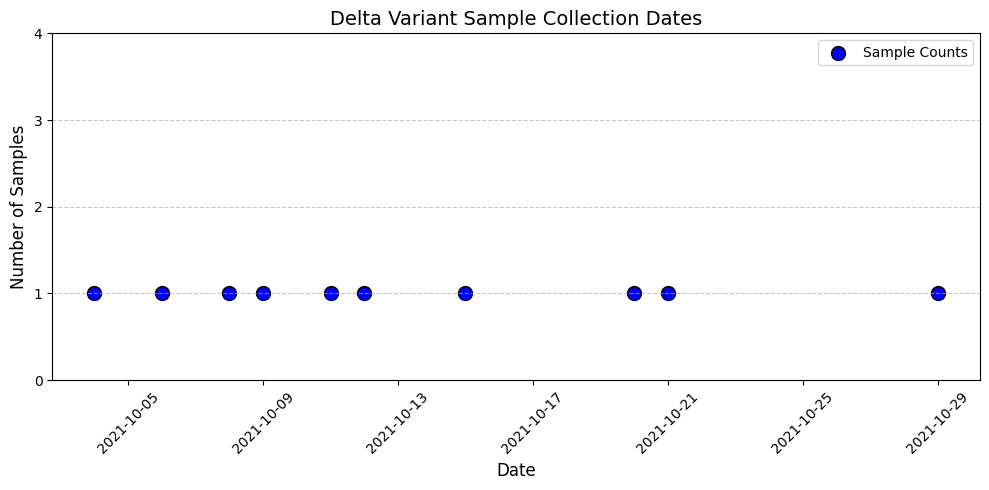

In [ ]:
visualize_data_samples_timeline(reference_sequences, "Delta")

**Get the lengths of the sequences**

In [ ]:
def print_sequences_length(sequences):
  """
    Prints the length of each sequence and their average length.

    Args:
    - sequences: List of Bio.SeqRecord objects representing the samples
  """
  sequence_lengths = [len(record.seq) for record in reference_sequences]
  # Print the lengths of the sequences
  for i, length in enumerate(sequence_lengths, start=1):
      print(f"Sequence {i}: Length = {length}")

  # Display the average sequence length
  average_length = sum(sequence_lengths) / len(sequence_lengths)
  print(f"\nAverage Length of the 10 sequences: {average_length}")

In [ ]:
print_sequences_length(reference_sequences)

Sequence 1: Length = 29598
Sequence 2: Length = 29601
Sequence 3: Length = 29598
Sequence 4: Length = 29598
Sequence 5: Length = 29598
Sequence 6: Length = 29604
Sequence 7: Length = 29598
Sequence 8: Length = 29610
Sequence 9: Length = 29598
Sequence 10: Length = 29610

Average Length of the 10 sequences: 29601.3


# **Select 10 Omicron variant sequences from Ghana**

In [7]:
case_sequences = load_data("/content/ghana_omicron.fasta", "case|")

Loaded 10 sequences.


In [ ]:
for i, record in enumerate(case_sequences):
    print(f"Sequence {i+1}:")
    print(f"ID: {record.id}")
    print(f"Name: {record.name}")
    print(f"Description: {record.description}")

Sequence 1:
ID: case|EPI_ISL_6939033|2021-11-25
Name: case|EPI_ISL_6939033|2021-11-25
Description: hCoV-19/Ghana/TRA-2298/2021|EPI_ISL_6939033|2021-11-25
Sequence 2:
ID: case|EPI_ISL_6939034|2021-11-25
Name: case|EPI_ISL_6939034|2021-11-25
Description: hCoV-19/Ghana/TRA-2303/2021|EPI_ISL_6939034|2021-11-25
Sequence 3:
ID: case|EPI_ISL_6939036|2021-11-26
Name: case|EPI_ISL_6939036|2021-11-26
Description: hCoV-19/Ghana/TRA-2342/2021|EPI_ISL_6939036|2021-11-26
Sequence 4:
ID: case|EPI_ISL_7661095|2021-11-28
Name: case|EPI_ISL_7661095|2021-11-28
Description: hCoV-19/Ghana/TRA-2366/2021|EPI_ISL_7661095|2021-11-28
Sequence 5:
ID: case|EPI_ISL_8065961|2021-11-22
Name: case|EPI_ISL_8065961|2021-11-22
Description: hCoV-19/Ghana/NMIMR-NCOV-21-60354/2021|EPI_ISL_8065961|2021-11-22
Sequence 6:
ID: case|EPI_ISL_8065963|2021-11-25
Name: case|EPI_ISL_8065963|2021-11-25
Description: hCoV-19/Ghana/NMIMR-NCOV-21-60454/2021|EPI_ISL_8065963|2021-11-25
Sequence 7:
ID: case|EPI_ISL_8065967|2021-12-07
Name: 

In [8]:
# Save the first 10 sequences to a new FASTA file
case_sequences_path = "case_sequences.fasta"
SeqIO.write(case_sequences, case_sequences_path, "fasta")
print(f"Saved the first 10 sequences to {case_sequences_path}")

Saved the first 10 sequences to case_sequences.fasta


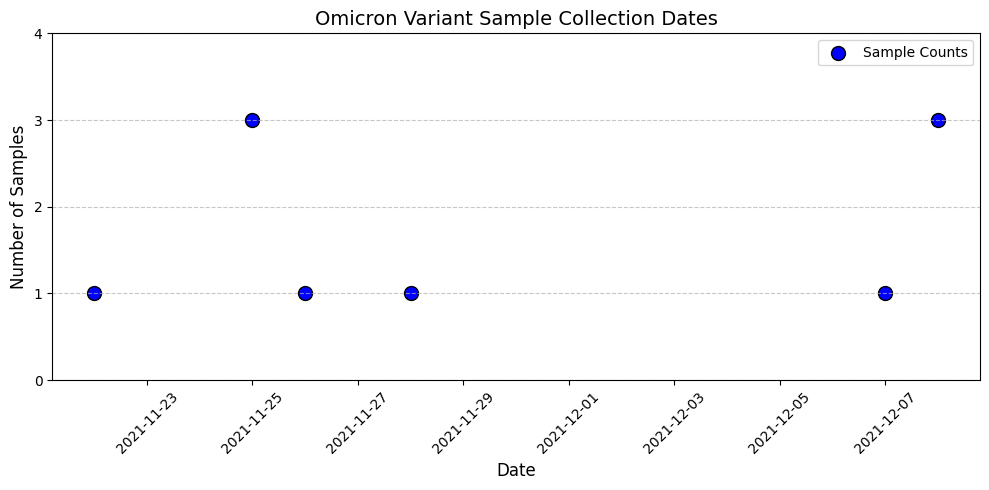

In [ ]:
visualize_data_samples_timeline(case_sequences, "Omicron")

In [ ]:
print_sequences_length(case_sequences)

Sequence 1: Length = 29598
Sequence 2: Length = 29601
Sequence 3: Length = 29598
Sequence 4: Length = 29598
Sequence 5: Length = 29598
Sequence 6: Length = 29604
Sequence 7: Length = 29598
Sequence 8: Length = 29610
Sequence 9: Length = 29598
Sequence 10: Length = 29610

Average Length of the 10 sequences: 29601.3


# **Multiple Sequence Alignment using ClustalW**

In [ ]:
def align_multiple_sequences(seq_file):
  """
    Aligns multiple sequences using ClustalW.

    Args:
    - seq_file: Path to the FASTA file containing the sequences to be aligned.

    Returns:
    - aligned_file: Path to the aligned FASTA file.
  """
  clustalw_exe = "/usr/bin/clustalw"
  aligned_file= f"{seq_file[:-5]}aln"
  clustalw_cline = ClustalwCommandline(clustalw_exe, infile=seq_file, outfile = aligned_file)
  print(clustalw_cline)
  # Run ClustalW
  stdout, stderr = clustalw_cline()
  print(f"Alignment completed. Output saved to {seq_file[:-5]}aln.")
  return aligned_file

In [ ]:
reference_seq_aligned_file= align_multiple_sequences(reference_sequences_path)

# Load the alignment
alignment = AlignIO.read(reference_seq_aligned_file, "clustal")
print(f"Alignment contains {len(alignment)} sequences of length {alignment.get_alignment_length()}")

/usr/bin/clustalw -infile=reference_sequences.fasta -outfile=reference_sequences.aln
Alignment completed. Output saved to reference_sequences.aln.
Alignment contains 10 sequences of length 29611


# **Consensus Sequence Construction**

In [ ]:
# Construct the consensus sequence
def get_consensus(alignment):
    """
    Constructs a consensus sequence from an alignment.

    Args:
    - alignment: Bio.Align.MultipleSeqAlignment object representing the alignment.

    Returns:
    - consensus: Consensus sequence as a string.
    """
    consensus = ""
    for i in range(alignment.get_alignment_length()):
        # Extract the column at position i
        column = alignment[:, i]
        # Get the most common element
        most_common = Counter(column).most_common(1)[0][0]
        consensus += most_common
    return consensus

consensus_sequence = get_consensus(alignment)
print(f"Consensus sequence:\n{consensus_sequence}")

Consensus sequence:
AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTTTTGCAGCCGATCATCAGCACATCTAGGTTTTGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGATGCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAGGCATTCAGTACGGTCGTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGGCGAAATACCAGTGGCTTACCGCAAGGTTCTTCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCATTTGACTTAGGCGACGAGCTTGGCACTGATCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTGTTACCCGTGAACTCATGCGTGAGCTTAACGGAGGGGCATACACTCGCTATGTCGATAACAACTTCTGTGGCCCTGATGGCTACCCTCTTGAGTGCATTAAAGACCTTCTAGCACGTGCTGGTAAAGCTTCATGCACTTTGTCCGAACAACTGGACTTTATTGACACTAAGAGGGGTGTATACTGCTGCCGTGAACATGAGCATGAAATTGCTTGGTACACGGAACGTTCTGAAAAGAGCTATGAATTGCAGACACCTTTTGAAA

In [ ]:
# Calculate the length of the consensus sequence
consensus_length = len(consensus_sequence)

# Print the length of the consensus sequence
print(f"Length of the Consensus Sequence: {consensus_length}")

Length of the Consensus Sequence: 29611


In [ ]:
# Save the consensus sequence to a file
consensus_record = SeqRecord(Seq(consensus_sequence), id="Consensus", description="Consensus sequence of reference")
consensus_output_path = "consensus_sequence.fasta"
SeqIO.write(consensus_record, consensus_output_path, "fasta")
print(f"Consensus sequence saved to {consensus_output_path}")

Consensus sequence saved to consensus_sequence.fasta


**Multiple Sequence Alignment of Case Sequences**

In [ ]:
case_seq_alignment= align_multiple_sequences("case_sequences.fasta")

case_alignment = AlignIO.read(case_seq_alignment, "clustal")
print(f"Alignment contains {len(case_alignment)} sequences of length {case_alignment.get_alignment_length()}")

/usr/bin/clustalw -infile=case_sequences.fasta -outfile=case_sequences.aln
Alignment completed. Output saved to case_sequences.aln.
Alignment contains 10 sequences of length 29785


# **Construct a phylogenetic tree between all the above 20 sequencs**

In [9]:
# Paths to Delta and Omicron FASTA files
reference_seq = "/content/reference_sequences.fasta"
case_seq = "/content/case_sequences.fasta"

# Output combined file
combined_fasta = "combined_sequences.fasta"

# Read and combine sequences
reference_sequences = list(SeqIO.parse(reference_seq, "fasta"))
case_sequences = list(SeqIO.parse(case_seq, "fasta"))
SeqIO.write(reference_sequences + case_sequences, combined_fasta, "fasta")
print(f"Combined sequences saved to {combined_fasta}")

Combined sequences saved to combined_sequences.fasta


In [ ]:
combined_sequence_alignment_file= align_multiple_sequences(combined_fasta)

/usr/bin/clustalw -infile=combined_sequences.fasta -outfile=combined_sequences.aln
Alignment completed. Output saved to combined_sequences.aln.


In [ ]:
alignment = AlignIO.read(combined_sequence_alignment_file, "clustal")
print(f"Alignment contains {len(alignment)} sequences of length {alignment.get_alignment_length()}")

Alignment contains 20 sequences of length 29797


In [ ]:
# Proceed with distance calculation
calculator = DistanceCalculator("identity")
dm = calculator.get_distance(alignment)
print("Distance Matrix:")
print(dm)

Distance Matrix:
ref|EPI_ISL_8065904|2021-10-12  0.000000
ref|EPI_ISL_8065944|2021-10-29  0.011545    0.000000
ref|EPI_ISL_8065876|2021-10-06  0.003188    0.012753    0.000000
ref|EPI_ISL_8065926|2021-10-20  0.014162    0.023190    0.013894    0.000000
ref|EPI_ISL_8065891|2021-10-09  0.001947    0.011645    0.002450    0.013995    0.000000
ref|EPI_ISL_8065913|2021-10-15  0.001980    0.011511    0.002450    0.014129    0.001208    0.000000
ref|EPI_ISL_8065929|2021-10-21  0.002047    0.011612    0.002416    0.014431    0.001443    0.001107    0.000000
ref|EPI_ISL_8065881|2021-10-08  0.002282    0.011847    0.002316    0.014465    0.001544    0.001275    0.000973    0.000000
ref|EPI_ISL_8065860|2021-10-04  0.002416    0.012149    0.002584    0.014867    0.001611    0.001812    0.001712    0.001074    0.000000
ref|EPI_ISL_8065900|2021-10-11  0.002215    0.012921    0.003658    0.015438    0.002483    0.002517    0.002584    0.002081    0.001879    0.000000
case|EPI_ISL_8065975|2021-12-0  0

Phylogenetic tree constructed.


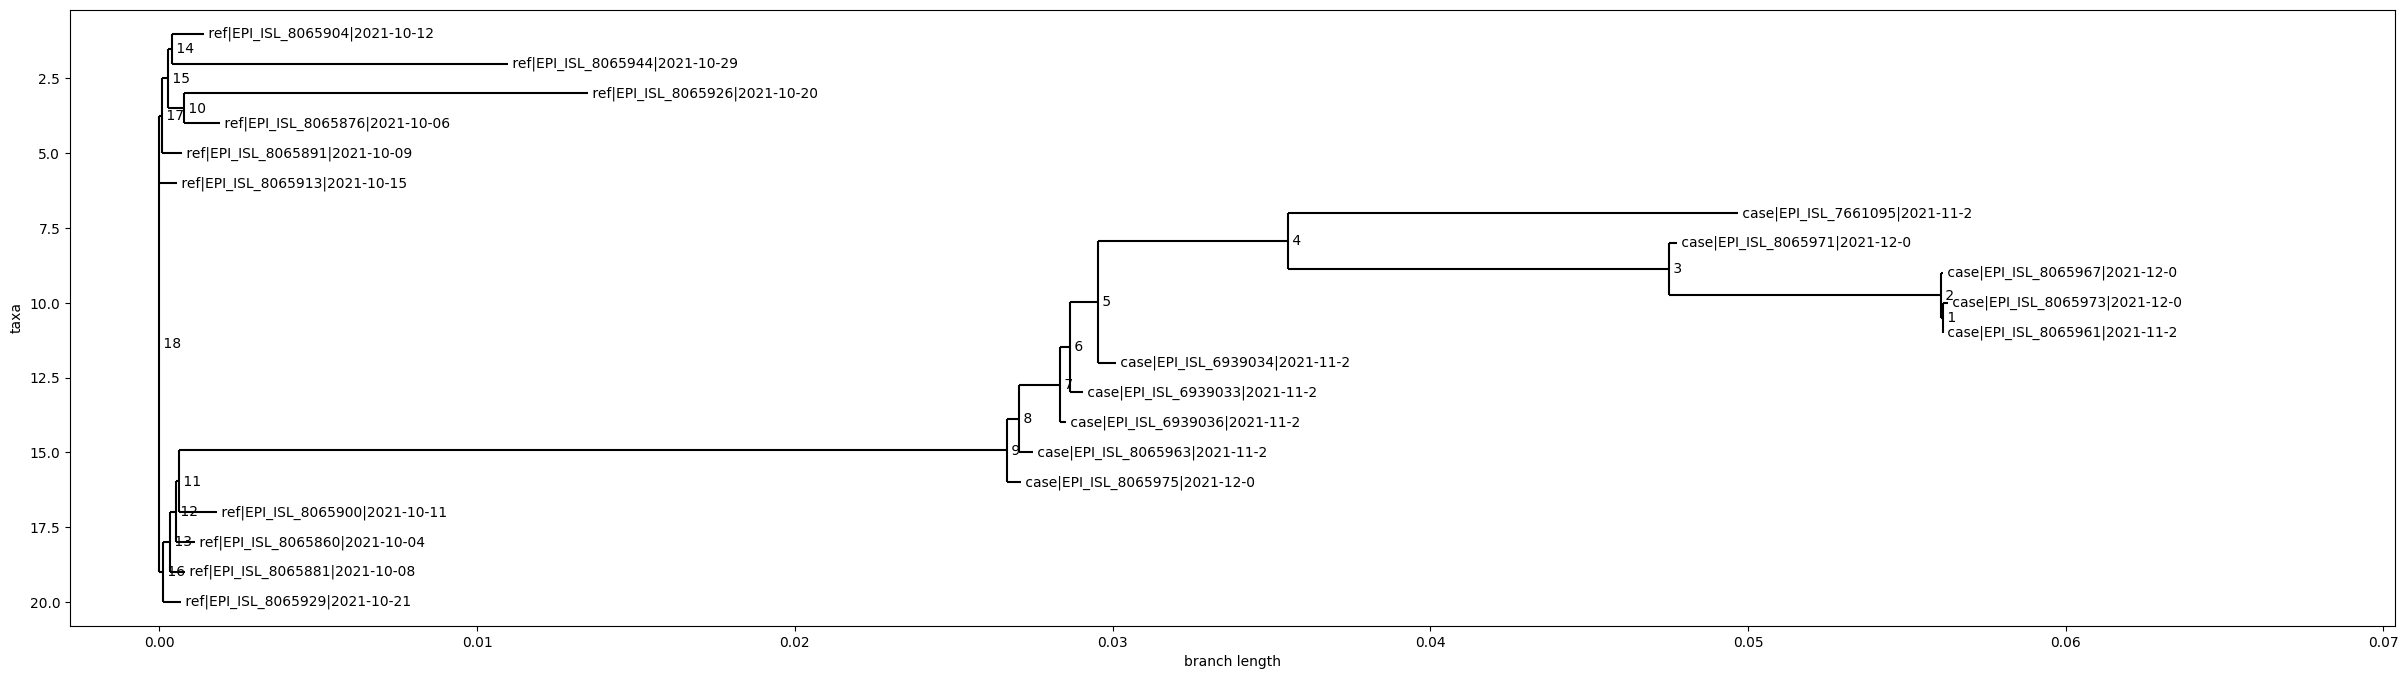

In [ ]:
# Construct the Phylogenetic Tree
constructor = DistanceTreeConstructor(calculator)
tree = constructor.nj(dm)  # Neighbor-Joining method
print("Phylogenetic tree constructed.")

# Visualize the Phylogenetic Tree
def draw_phylogenetic_tree(tree):
    """
    Draws a phylogenetic tree in a greater figer size and removes unnecessary labels for improved visualization.

    Args:
    - tree: Bio.Phylo.BaseTree object representing the phylogenetic tree.
    """
    # Create a figure and axis to adjust spacing
    fig, ax = plt.subplots(figsize=(30, 8))
    for clade in tree.find_clades():
        # Check if the current node is an inner node
        if not clade.is_terminal():
            # Rename inner nodes from "inner1, inner2,..." to only contain the number for less crowded visualization
            clade.name = re.sub(r"[^0-9]", "", clade.name)
    # Draw the tree using Biopython
    Phylo.draw(tree, do_show=False, axes=ax)

    # Display the updated tree
    plt.show()

draw_phylogenetic_tree(tree)

# **Average percentage of the chemical constituents (C, G, T, and A) and the CG content**

In [ ]:
def calculate_nucleotide_percentage(sequences):
    """
    Calculates the percentage of nucleotides (A, C, G, T, and N) in a list of sequences.

    Args:
    - sequences: List of Bio.SeqRecord objects representing the sequences.
    Returns:
    - percentages: Dictionary containing percentages of A, C, G, and T.
    """
    # Combine all sequences into a single string
    all_sequences = "".join(str(record.seq) for record in sequences)

    # Count nucleotides
    counts = Counter(all_sequences)
    total_count = sum(counts.values())

    # Calculate percentages
    percentages = {nt: (counts[nt] / total_count) * 100 for nt in "ACGTN"}
    percentages["CG_content"] = ((counts["C"] + counts["G"]) / total_count) * 100
    return percentages

In [ ]:
def plot_nucleotide_percentages(percentages, title):
    """
    Plots a pie chart of nucleotide percentages.
    Args:
    - percentages: Dictionary containing percentages of A, C, G, and T.
    - title: Title of the plot.
    """
    # Extract data for plotting
    nucleotides = ["A", "C", "G", "T", "N"]
    labels= ["A", "C", "G", "T", "unknown"]
    values = [percentages[nt] for nt in nucleotides]
    colors = ['blue', 'green', 'red', 'orange', 'brown']

    # Create the pie chart
    plt.figure(figsize=(4, 4))
    plt.pie(
        values,
        labels=labels,
        autopct=lambda pct: f"{pct:.2f}%",
        startangle=90,
        colors=colors,
        # Slightly "explode" the T slice
        explode=(0, 0, 0, 0.1, 0),
        shadow=True
    )

    # Add a title
    plt.title(f"{title} Sequences Nucleotide Percentage Composition", fontsize=12)

    # Show the plot
    plt.tight_layout()
    plt.show()

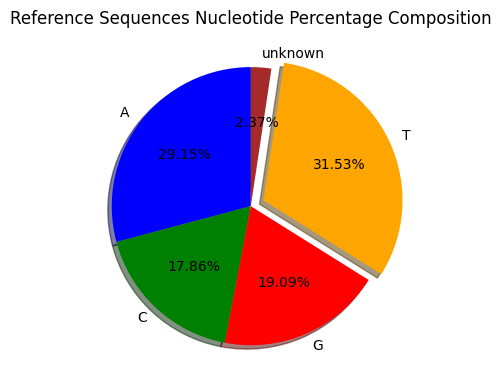

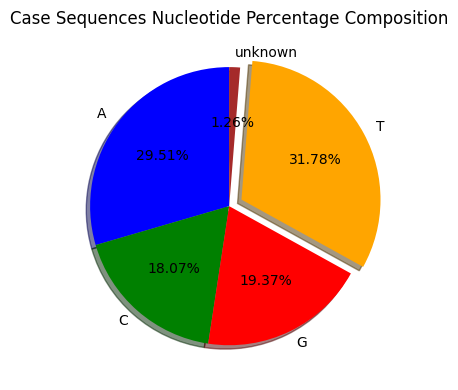

Reference Sequences - Nucleotide Percentages:
A: 29.15%
C: 17.86%
G: 19.09%
T: 31.53%
N: 2.37%
CG_content: 36.95%

Case Sequences - Nucleotide Percentages:
A: 29.51%
C: 18.07%
G: 19.37%
T: 31.78%
N: 1.26%
CG_content: 37.45%


In [ ]:
# Load reference and case sequences
reference_sequences = list(SeqIO.parse("reference_sequences.fasta", "fasta"))
case_sequences = list(SeqIO.parse("case_sequences.fasta", "fasta"))

# Calculate percentages for references and case
reference_percentages = calculate_nucleotide_percentage(reference_sequences)
case_percentages = calculate_nucleotide_percentage(case_sequences)
plot_nucleotide_percentages(reference_percentages, "Reference")
plot_nucleotide_percentages(case_percentages, "Case")
# Print results
print("Reference Sequences - Nucleotide Percentages:")
for nt, percentage in reference_percentages.items():
    print(f"{nt}: {percentage:.2f}%")

print("\nCase Sequences - Nucleotide Percentages:")
for nt, percentage in case_percentages.items():
    print(f"{nt}: {percentage:.2f}%")

In [ ]:
def plot_cg_content_comparison(case_percentages, reference_percentages):
    """
    Plots a bar graph comparing CG content between reference and case sequences.

    Args:
    - case_percentages: Dictionary containing percentages of CG in case sequences.
    - reference_percentages: Dictionary containing percentages of CG in reference sequences.
    """
    # Extract CG content
    cg_contents = {
        "Case Sequences": case_percentages["CG_content"],
        "Reference Sequence": reference_percentages["CG_content"],
    }

    # Plot bar graph
    labels = list(cg_contents.keys())
    values = list(cg_contents.values())

    plt.figure(figsize=(8, 5))
    plt.bar(labels, values, color=['blue', 'orange'], edgecolor='black')
    plt.title("CG Content Comparison", fontsize=14)
    plt.ylabel("CG Content (%)", fontsize=12)
    plt.ylim(0, 100)

    # Display values on top of bars
    for i, value in enumerate(values):
        plt.text(i, value + 1, f"{value:.2f}%", ha='center', fontsize=10)

    # Show plot
    plt.tight_layout()
    plt.show()

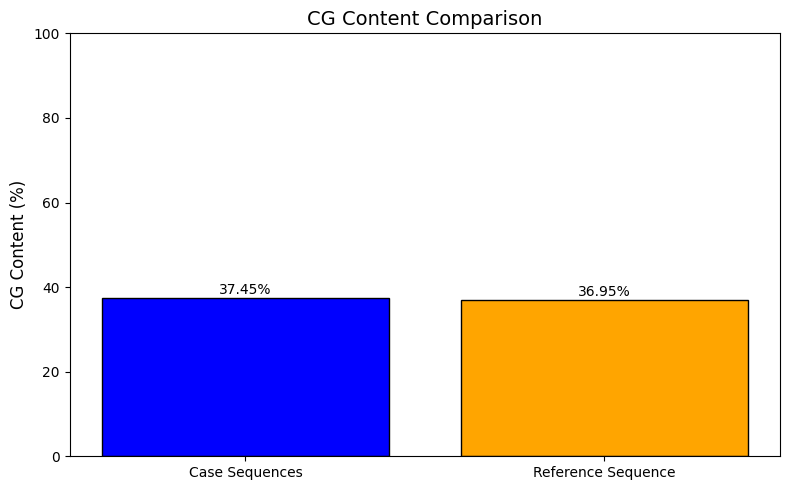

In [ ]:
plot_cg_content_comparison(case_percentages, reference_percentages)

# **Extract the dissimilar columns between the alignment of the case sequences and the consensus sequence**

In [12]:
!seqret -sequence case_sequences.aln -outseq case_sequences_alignment.fasta

Read and write (return) sequences


In [13]:
!mafft --add consensus_sequence.fasta case_sequences_alignment.fasta > case_and_consenus_alignment.aln

nadd = 1
nthread = 0
nthreadpair = 0
nthreadtb = 0
ppenalty_ex = 0
stacksize: 8192 kb
generating a scoring matrix for nucleotide (dist=200) ... done
Gap Penalty = -1.53, +0.00, +0.00



Making a distance matrix ..

There are 4368 ambiguous characters.
    1 / 11
done.

Constructing a UPGMA tree (efffree=0) ... 
    0 / 11
done.

Progressive alignment 1/2... 
STEP    10 / 10  f
done.

Making a distance matrix from msa.. 
    0 / 11
done.

Constructing a UPGMA tree (efffree=1) ... 
    0 / 11
done.

Progressive alignment 2/2... 
STEP     9 / 10  f
done.

disttbfast (nuc) Version 7.490
alg=A, model=DNA200 (2), 1.53 (4.59), -0.00 (-0.00), noshift, amax=0.0
0 thread(s)


Strategy:
 FFT-NS-2 (Fast but rough)
 Progressive method (guide trees were built 2 times.)

If unsure which option to use, try 'mafft --auto input > output'.
For more information, see 'mafft --help', 'mafft --man' and the mafft page.

The default gap scoring scheme has been changed in version 7.110 (2013 Oct).
It tends 

In [14]:
def identify_mismatch_regions_and_residues(aligned_file):
    """
      Identifies regions of consecutive mismatches and individual mismatch residues in an aligned FASTA file.

      Args:
      - aligned_file: Path to the aligned FASTA file.
      Returns:
      - mismatch_indices: List of indices of all columns with mismatches.
      - mismatch_regions: List of tuples representing mismatch regions start and end indices.
      - individual_mismatches: List of indices of individual mismatch residues (point mutation).
    """
    alignment = AlignIO.read(aligned_file, "fasta")
    seq_ids = [record.id for record in alignment]
    sequences = [str(record.seq) for record in alignment]
    seq_length = alignment.get_alignment_length()

    mismatch_regions = []
    individual_mismatches = []
    mismatch_indices = []
    with open("mismatch_region_output.txt", "w") as output:
      i = 0
      # Loop through the columns
      while i < seq_length:
          column = [seq[i] for seq in sequences]
          # Check for a mismatch column
          if len(set(column) - {"-"}) > 1:
              start = i
              # Continue until no more mismatches
              while i < seq_length and len(set([seq[i] for seq in sequences]) - {"-"}) > 1:
                  mismatch_indices.append(i)
                  i += 1
              end = i - 1
              # Check the length of mismatch to discover if its one residue or a region of multiple residues
              if start != end:
                mismatch_regions.append((start, end))
              else:
                  individual_mismatches.append(i-1)
          i += 1
      output.write("Mismatch Regions and Residues:\n")
      print("Mismatch Regions and Residues:")
      for start, end in mismatch_regions:
          output.write(f"A mismatch region found from index {start + 1} to {end + 1}:\n")
          print(f"A mismatch region found from index {start + 1} to {end + 1}:")
          for seq_id, sequence in zip(seq_ids, sequences):
              # adjust the alignment of the sequences
              if (len(seq_id)< 30):
                output.write(f"{seq_id}                     : {sequence[start:end + 1]}\n")
                print(f"{seq_id}                     : {sequence[start:end + 1]}")
              else:
                output.write(f"{seq_id}: {sequence[start:end + 1]}\n")
                print(f"{seq_id}: {sequence[start:end + 1]}")

      for idx in individual_mismatches:
          output.write(f"A mismatch residue found at index {idx + 1}:\n")
          print(f"A mismatch residue found at index {idx + 1}:")
          for seq_id, sequence in zip(seq_ids, sequences):
              if (len(seq_id)< 30):
                output.write(f"{seq_id}                     : {sequence[idx]}\n")
                print(f"{seq_id}                     : {sequence[idx]}")
              else:
                output.write(f"{seq_id}: {sequence[idx]}\n")
                print(f"{seq_id}: {sequence[idx]}")
      output.write(f"Number of mismatches: {len(mismatch_indices)}\n")
      output.write(f"Number of mismatch regions: {len(mismatch_regions)}\n")
      output.write(f"Number of individual mismatches: {len(individual_mismatches)}\n")
      output.write(f"Percentage of columns of mismatch {(len(mismatch_indices) / alignment.get_alignment_length()) * 100:.2f}%\n")
    return mismatch_indices, mismatch_regions, individual_mismatches

In [15]:
mismatch_indices, mismatch_regions, individual_mismatches= identify_mismatch_regions_and_residues("case_and_consenus_alignment.aln")

Mismatch Regions and Residues:
A mismatch region found from index 1076 to 1077:
case|EPI_ISL_8065963|2021-11-2: ga
case|EPI_ISL_8065975|2021-12-0: ga
case|EPI_ISL_6939036|2021-11-2: ga
case|EPI_ISL_6939033|2021-11-2: ga
case|EPI_ISL_6939034|2021-11-2: ga
case|EPI_ISL_7661095|2021-11-2: ga
case|EPI_ISL_8065961|2021-11-2: ga
case|EPI_ISL_8065973|2021-12-0: ga
case|EPI_ISL_8065967|2021-12-0: ga
case|EPI_ISL_8065971|2021-12-0: ga
Consensus                     : nn
A mismatch region found from index 1141 to 1210:
case|EPI_ISL_8065963|2021-11-2: tgaatgcaaccaaatgtgcctttcaactctcatgaagtgtgatcattgtggtgaaacttcatggcagacg
case|EPI_ISL_8065975|2021-12-0: tgaatgcaaccaaatgtgcctttcaactctcatgaagtgtgatcattgtggtgaaacttcatggcagacg
case|EPI_ISL_6939036|2021-11-2: tgaatgcaaccaaatgtgcctttcaactctcatgaagtgtgatcattgtggtgaaacttcatggcagacg
case|EPI_ISL_6939033|2021-11-2: tgaatgcaaccaaatgtgcctttcaactctcatgaagtgtgatcattgtggtgaaacttcatggcagacg
case|EPI_ISL_6939034|2021-11-2: tgaatgcaaccaaatgtgcctttcaactctcatgaagtgtga

In [16]:
print(f"Number of mismatches: {len(mismatch_indices)}")
print(f"Number of mismatch regions: {len(mismatch_regions)}")
print(f"Number of individual mismatches: {len(individual_mismatches)}")
alignment = AlignIO.read("case_sequences.aln", "clustal")
print(f"Percentage of columns of mismatch {(len(mismatch_indices) / alignment.get_alignment_length()) * 100:.2f}%")

Number of mismatches: 1892
Number of mismatch regions: 22
Number of individual mismatches: 75
Percentage of columns of mismatch 6.35%


In [ ]:
def classify_mutations(aligned_file, mismatch_indicies):
    """
      Classifies mutations into variant-related mutations and sample-related mutations.
      Variant-related mutations occur when at least 9 out of the 10 case sequences have similar residues which differ
      from that of the consensus sequence, indicating that this mutation is most likely variant-dependent.
      In contrast, sample-related mutations occur when variability exists in multiple case sequences,
      or when one sequence uniquely differs from the rest.

      Args:
      - aligned_file: Path to the aligned FASTA file.
      - mismatch_indicies: List of indices of mismatch residues.

      Returns:
      - sample_related: List of indices of sample-related mutations.
      - variant_related: List of indices of variant-related mutations.
    """
    alignment = AlignIO.read(aligned_file, "fasta")
    seq_ids = [record.id for record in alignment]
    sequences = [str(record.seq) for record in alignment]
    # Extract the reference sequence
    ref_seq = sequences[-1]
    # Extract the aligned case sequnces
    case_seqs = sequences[:-1]

    seq_length = alignment.get_alignment_length()
    variant_related = []
    sample_related = []
    # Loop through all the previously detected mutations
    for i in mismatch_indicies:
        column = [seq[i] for seq in case_seqs]
        ref_residue = ref_seq[i]
        column_counter = Counter(column)

        # if 9 or 10 sequences of the case sequences have similar residue which differs from the consensus residue then this mutation is most
        # probably related to the differences between the delta and the omicron variants
        if column_counter.most_common(1)[0][1] >= 9 and ref_residue != column_counter.most_common(1)[0][0] :
          variant_related.append((i))

        # if there is variability in the case sequences themselves then this mutation is sample-related mutation
        else:
          sample_related.append((i))

    variant_percent = len(variant_related) / len(mismatch_indicies) * 100
    sample_percent = len(sample_related) / len(mismatch_indicies) * 100
    with open("mutations_classifications.txt", "w") as output:
      output.write("Mutation Classification:\n")
      output.write(f"Variant-related mutations: {len(variant_related)} ({variant_percent:.2f}%)\n")
      output.write(f"Sample-related mutations: {len(sample_related)} ({sample_percent:.2f}%)\n")
    print("Mutation Classification:")
    print(f"Variant-related mutations: {len(variant_related)} ({variant_percent:.2f}%)")

    print(f"Sample-related mutations: {len(sample_related)} ({sample_percent:.2f}%)")
    return sample_related, variant_related



In [ ]:
sample_related, variant_related = classify_mutations("case_and_consenus_alignment.aln", mismatch_indices)

Mutation Classification:
Variant-related mutations: 684 (36.15%)
Sample-related mutations: 1208 (63.85%)


In [ ]:
# print 5 variant-related mutations and 5 sample-related mutations for validation
alignment = AlignIO.read("case_and_consenus_alignment.aln", "fasta")
seq_ids = [record.id for record in alignment]
sequences = [str(record.seq) for record in alignment]
with open("mutations_classifications.txt", "a") as output:
  output.write("Sample-related mutations examples:\n")
  for idx in sample_related[:5]:
      output.write(f"sample-related mutation at index {idx + 1}:\n")
      print(f"sample-related mutation at index {idx + 1}:")
      for seq_id, sequence in zip(seq_ids, sequences):
              if (len(seq_id)< 30):
                output.write(f"{seq_id}                     : {sequence[idx]}\n")
                print(f"{seq_id}                     : {sequence[idx]}")
              else:
                output.write(f"{seq_id}: {sequence[idx]}\n")
                print(f"{seq_id}: {sequence[idx]}")
  output.write("Variant-related mutations examples:\n")
  for idx in variant_related[-5:]:
      output.write(f"variant-related mutation at index {idx + 1}:\n")
      print(f"variant-related mutation at index {idx + 1}:")
      for seq_id, sequence in zip(seq_ids, sequences):
              if (len(seq_id)< 30):
                output.write(f"{seq_id}                     : {sequence[idx]}\n")
                print(f"{seq_id}                     : {sequence[idx]}")
              else:
                output.write(f"{seq_id}: {sequence[idx]}\n")
                print(f"{seq_id}: {sequence[idx]}")


sample-related mutation at index 840:
case|EPI_ISL_8065963|2021-11-2: a
case|EPI_ISL_8065975|2021-12-0: g
case|EPI_ISL_6939036|2021-11-2: a
case|EPI_ISL_6939033|2021-11-2: a
case|EPI_ISL_6939034|2021-11-2: a
case|EPI_ISL_7661095|2021-11-2: a
case|EPI_ISL_8065961|2021-11-2: a
case|EPI_ISL_8065973|2021-12-0: a
case|EPI_ISL_8065967|2021-12-0: a
case|EPI_ISL_8065971|2021-12-0: a
Consensus                     : a
sample-related mutation at index 1574:
case|EPI_ISL_8065963|2021-11-2: c
case|EPI_ISL_8065975|2021-12-0: n
case|EPI_ISL_6939036|2021-11-2: c
case|EPI_ISL_6939033|2021-11-2: c
case|EPI_ISL_6939034|2021-11-2: c
case|EPI_ISL_7661095|2021-11-2: c
case|EPI_ISL_8065961|2021-11-2: c
case|EPI_ISL_8065973|2021-12-0: c
case|EPI_ISL_8065967|2021-12-0: c
case|EPI_ISL_8065971|2021-12-0: c
Consensus                     : c
sample-related mutation at index 2416:
case|EPI_ISL_8065963|2021-11-2: c
case|EPI_ISL_8065975|2021-12-0: t
case|EPI_ISL_6939036|2021-11-2: c
case|EPI_ISL_6939033|2021-11-2: c


In [ ]:
def print_mismatches_concatenated(aligned_file):
    """
    Prints columns with mismatches concatenated for each sequence.
    Args:
    - aligned_file: Path to the aligned FASTA file.
    """
    alignment = AlignIO.read(aligned_file, "fasta")
    seq_ids = [record.id for record in alignment]
    sequences = [str(record.seq) for record in alignment]

    mismatched_sequences = {seq_id: [] for seq_id in seq_ids}

    seq_length = alignment.get_alignment_length()
    for i in range(seq_length):
        column = [seq[i] for seq in sequences]
        if len(set(column) - {"-"}) > 1:  # Exclude gaps ("-")
            for seq_id, residue in zip(seq_ids, column):
                mismatched_sequences[seq_id].append(residue)

    print("Mismatched Regions:")
    for seq_id in seq_ids:
        mismatched_string = "".join(mismatched_sequences[seq_id])
        if (len(seq_id)< 30):
          print(f"{seq_id}                     : {mismatched_string}")
        else:
          print(f"{seq_id}: {mismatched_string}")

In [ ]:
print_mismatches_concatenated("case_and_consenus_alignment.aln")

Mismatched Regions:
case|EPI_ISL_8065963|2021-11-2: gagatgaatgcaaccaaatgtgcctttcaactctcatgaagtgtgatcattgtggtgaaacttcatggcagacgccgagggtgttttaactgctgtggttatacctactaaaaaggctggtggcactactgaaatgctagcgaaagctttgagaaaagtgccaacagacaattatataaccacttacccgggtcagggtttaaatggttacactgtagaggaggcaaagacagtgcttaaaaagtgtaaaagtgcctcgagaacaatgcaactaataaagccacgtataaaccaaatacctggtgtataccacgctggtgtttgtgtatctactagtggtagatgggtacttaacaatgattattacagatctttaccaggagttaaaatggtgctagccaagaaaaggacgaagatgcgtctgacagagaattacatctttcatgggaagttggtaaacctagaccaccacttaaccgacncggttgtgatggtggcagtttgtatgtaaataaacatgcattccacacaccagcttttgataaaagtgcttttgttaatttaaaacaattaccatttttctattactctgacagtccatgtgagtctcatggaaaacaagtagtgtcagatatagattatgtaccactaaagtctgctacgtgtataacacgttgcaatttaggtggtgctgtctgtagacatcatgctaatgagtacagattgtatctcgatgcttataacatgatgatctcagctggctttagcttgtgggtttcccaagatttatctgtagtttctacttaccccctgcatacactaattctttcacacgtggtgtttattaccctgactnnnnnnnt-gannnnacnagctcttgatacgagtcagcaggctgtttaataggggctgaatatgttgcgcaatcgtctgttgtttgtaacagt